Import Data

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the .mqa file
path = 'C:/Natuurkunde/NSP2/Data/testmetinghelling_2.mqa' 
df = pd.read_csv(path, sep='\t', header=0)

Calculate scaling factor, a and B

In [31]:
# Extract time, x-position, and y-position
time = df['Time']
x_position = df['Point #1.X']
y_position = df['Point #1.Y']

# Adjust the data to start at (0, 0)
# Shift x and y so that the initial values are (0, 0)
x_position_adjusted = x_position - x_position.iloc[0]
y_position_adjusted = y_position - y_position.iloc[0]  

# Define the scaling factor (adjust values for your known measurement)
known_distance_meters = 0.94  # known distance in meters
known_distance_pixels = 1052  # known distance in pixels
scaling_factor = known_distance_meters / known_distance_pixels

# Calculate s (distance in meters) for each time
s_pixels = np.sqrt(x_position_adjusted**2 + y_position_adjusted**2)
s_meters = s_pixels * scaling_factor

# Fit and plot, as previously detailed
def theoretical_s(t, a):
    return 0.5 * a * t**2

params, _ = curve_fit(theoretical_s, time, s_meters)
a_fitted = params[0]

# Calculations for B
g = 9.81  # Gravitational acceleration in m/s^2
alpha_degrees = 36.4
alpha_radians = np.radians(alpha_degrees)
B = g * np.sin(alpha_radians) / a_fitted

# Calculations for I
m = 0.1318
r_2 = 0.03 
I = (m * r_2**2 * B) - (m * r_2**2)

# Print results
print("Fitted acceleration (a):", a_fitted)
print("Calculated value of B:", B)
print("Calculated value of I:", I)
print("Scaling factor (meters per pixel):", scaling_factor)

Fitted acceleration (a): 2.698133396878696
Calculated value of B: 2.1575802309540273
Calculated value of I: 0.00013731216699576672
Scaling factor (meters per pixel): 0.0008935361216730037


Plot Graph

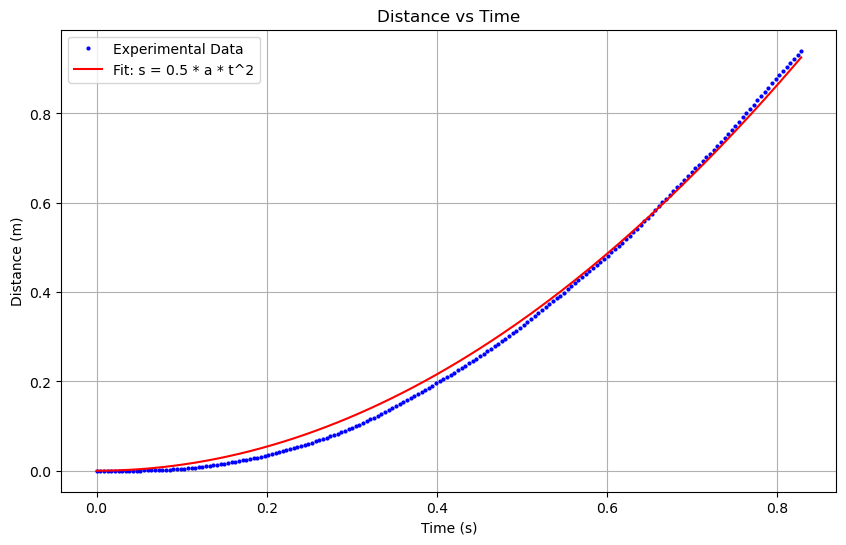

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(time, s_meters, 'bo', markersize = 2, label='Experimental Data')
plt.plot(time, theoretical_s(time, a_fitted), 'r-', label=f'Fit: s = 0.5 * a * t^2')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.title('Distance vs Time')
plt.legend()
plt.grid()
plt.show()